<a href="https://colab.research.google.com/github/nrjcs/mlip/blob/master/d3/fdp_mnist_fcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#basic fully connected neural network for mnist digit classification

## nice documentation is available at https://keras.io/



---



---



## -- Keras provides in-built support to many datasets
## -- such as MNIST (Modified National Institute of Standards and Technology database) @ http://yann.lecun.com/exdb/mnist/
	# database of handwritten digits
	# used  extensively in optical character recognition and machine learning research
	# training set of 60,000 examples, and a test set of 10,000 examples
	# digits have been size-normalized and centered in a fixed-size image
	# black and white digits
	# 28 x 28  pixels
	# Keras provides method to load MNIST data set

In [1]:
# load MNIST data set
from keras.datasets import mnist	 	#dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 	#Keras function

print ("mnist data downloaded...")

Using TensorFlow backend.


mnist data downloaded...


### plot images...

> subplot function is being used

> nice documentation is available on the official webpage of matplotlib

> arguments to subplot functions are number of rows, number of columns and number of subplots in the plot

> comma is mandatory if values are less than 10


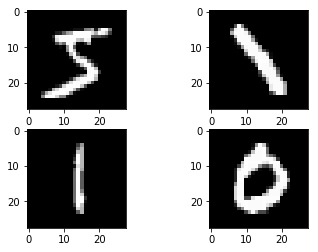

In [2]:

# comment if do not want to print

import matplotlib.pyplot as plt			#to plot images

plt.subplot(221)	
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) # ploting first image of training data set
plt.subplot(222)
plt.imshow(X_train[134], cmap=plt.get_cmap('gray'))	# ploting 135th image in training data set
plt.subplot(223)
plt.imshow(X_test[2444], cmap=plt.get_cmap('gray'))	# ploting 2445th image of test date set
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))	# ploting 4th image of test data set
# show the plot
plt.show()

In [3]:
# Print shape of dataset..it will print three tuples, namely the no. of images in dataset, height and width(60000, 28, 28)

print (X_train.shape)

(60000, 28, 28)


In [4]:

# Step 3: Preprocess input data for Keras

# flatten 28*28 images to a 784 vector for each image and pixel precision set to 32 bit
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Step 4: Preprocess class labels
# check shape of our class label data

print (Y_train.shape)
#We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.


(60000,)


In [5]:
#check labels for the first 10 training samples:
print (Y_train[:10])
# output of the form [5 0 4 1 9 2 1 3 1 4]
#The Y_train and Y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

[5 0 4 1 9 2 1 3 1 4]


In [6]:

from keras.utils import np_utils		#for transforming data 

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

# check again	
print (Y_train.shape)
# (60000, 10)
print (Y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]



### a very simple model is being created in next few lines...this is the most important part => creating a good network

### Use sequential model
>  a Sequential model is declared as
>>        model = Sequential()
then dense layers are added


> Dense implements the operation: output = activation(dot(input, kernel) + bias) 
           >>  activation is the element-wise activation function passed as the activation argument
           >>  kernel is a weights matrix created by the layer
           >>  bias is a bias vector created by the layer (only applicable if use_bias is True)
      
> adding layers (can be combined with layer declaration as well)
>>         model = Sequential([Dense(32, input_shape=(784,)), Activation('relu'),Dense(10), Activation('softmax'),])
 

>> > Or

>>         model.add(Dense(32, input_dim=784))
>>         model.add(Activation('relu'))

> model needs to know what input shape it should expect

>> first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape


> Dense(32, input_dim=784) specifies that it is 
		>> first (input) layer
        
  >> output dimension is 32 ($1^{st}$ argument 
    
>> input dimension is 784

   >> kernel_initializer: Initializations define the way to set the initial random weights of Keras layers.
    
   >> kernel_initializer='normal': name of initialization function for the weights of the layer. normal for values 
    
   >> randomly drawn from normal distribution.
   
   >> many more intializers: Zeros, Ones, normal, Constant, normal , and many more
    
   >> If no activation function specified, no activation is applied (ie. "linear" activation: a(x) = x).


> activations: Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:    
>> many activation function are available in Keras: relu, softmax, sigmoid, tanh, so on

In [7]:
# Define model architecture

from keras.models import Sequential		#model
from keras.layers import Dense			#layer
from keras.layers import Dropout		#layer
from keras import initializers      # for importing initializers of keras

model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer=initializers.RandomNormal(), activation='relu')) #only one hidden layer with relu as activation function
#model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer=initializers.Constant(value=5), activation='relu')) #only one hidden layer with relu as activation function	
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))					#output layer with softmax as activation function


#print(model.summary())

print ("congrts model defined...")

W0724 06:25:31.581564 140215838865280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 06:25:31.597902 140215838865280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 06:25:31.600662 140215838865280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



congrts model defined...


### Before training, configure the learning process, using compile() method. Three argements:
    > loss function: the objective function that model try to minimize (it optimizes machine learning algorithm)
          >> many more: categorical_crossentropy, mean_squared_error, mean_squared_logarithmic_error, ......
    > optimizer: ANN training process is an optimization task with the aim of finding a set of weights to minimize some 
    > objective function
          >> determine how weights are updated
          >> many more: adam (Adaptive moment estimation), sgd (Stochastic gradient descent), 
    > list of metrics: used to judge performance of model, similar to loss function however not used for training purpose
      
### optimizer, loss function, meterics => very important step which will determine the performance of your network

In [8]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

print ("Compilation done ...")

W0724 06:25:31.638037 140215838865280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 06:25:31.668026 140215838865280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Compilation done ...


> training, validation, test

> multiple variations of the model is trained on the training dataset => parameter tuning

> one of the variation is chosen based performance on the validation set => model selection

> evaluation on test set

> epoch: number of times learning algorithm sees entire data

> batch size: number of samples processed before updating weights

> By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch. (no information, animated bar, numbe of epochs) )

In [9]:
#Train model


history=model.fit(X_train, Y_train,validation_split=0.2, epochs=2, batch_size=200, verbose=1)


print ("parameter tuning done...")

W0724 06:25:31.790979 140215838865280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 06:25:31.844182 140215838865280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 5s 109us/step - loss: 0.3115 - acc: 0.9112 - val_loss: 0.1577 - val_acc: 0.9558
Epoch 2/2
48000/48000 [==============================] - 5s 103us/step - loss: 0.1271 - acc: 0.9631 - val_loss: 0.1162 - val_acc: 0.9668
parameter tuning done...


In [10]:
# Step 8: Evaluate model
scores = model.evaluate(X_test, Y_test)
print("Error: %.2f%%" % (100-scores[1]*100))


10000/10000 [==============================] - 1s 56us/step
Error: 3.08%


In [11]:
print(model.metrics_names)

['loss', 'acc']


In [12]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


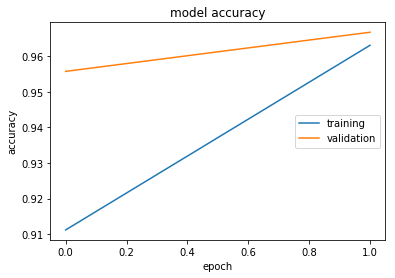

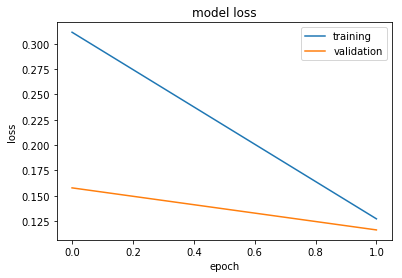

In [13]:


# to visualize the performance with plots...plot loss and accuracy in training and validation 
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()



**Additional**

---



=> Improving Performance of Simple Network: additional hidden layers (add one more dense layer)
 
     model.add(Dense(num_classes, kernel_initializer='normal', activation='relu'))
     
=> Improving Performance of Simple Network: additional hidden layers (add one more dense layer)

     model.add(Dense(num_classes, kernel_initializer='normal', activation='tanh'))

=> Improving Performance of Simple Network: introducing dropout layer

      model.add(Dropout(0.2))

=> Improving Performance of Simple Network: using different optimizers: SGD, Adagrad,Adam...

=> Improving Performance of Simple Network: training for more number of epochs (20)

=> other options to explore


> different learning rate for optimizer

> number of neurons in hidden layer

> batch size

> with different optimizers
   
> Increasing the number of internal hidden neurons
   
  
=> steps to follow to make an efficient image classifier?
     
     >lot of experimentation and testing to get the optimal structure and parameters